In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
confirmed = pd.read_csv('COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')
deaths = pd.read_csv('COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv')
recovery = pd.read_csv('COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv')

In [3]:
confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20
0,Anhui,Mainland China,31.8257,117.2264,1,9,15,39,60,70,...,982,986,987,988,989,989,989,989,989,989
1,Beijing,Mainland China,40.1824,116.4142,14,22,36,41,68,80,...,387,393,395,396,399,399,399,400,400,410
2,Chongqing,Mainland China,30.0572,107.8740,6,9,27,57,75,110,...,555,560,567,572,573,575,576,576,576,576
3,Fujian,Mainland China,26.0789,117.9874,1,5,10,18,35,59,...,292,293,293,293,293,293,293,294,294,296
4,Gansu,Mainland China,36.0611,103.8343,0,2,2,4,7,14,...,91,91,91,91,91,91,91,91,91,91


In [4]:
deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20
0,Anhui,Mainland China,31.8257,117.2264,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
1,Beijing,Mainland China,40.1824,116.4142,0,0,0,0,0,1,...,4,4,4,4,4,4,4,4,4,5
2,Chongqing,Mainland China,30.0572,107.8740,0,0,0,0,0,0,...,5,5,6,6,6,6,6,6,6,6
3,Fujian,Mainland China,26.0789,117.9874,0,0,0,0,0,0,...,0,0,1,1,1,1,1,1,1,1
4,Gansu,Mainland China,36.0611,103.8343,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [5]:
recovery.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20
0,Anhui,Mainland China,31.8257,117.2264,0,0,0,0,0,0,...,361,413,474,539,597,637,663,712,744,792
1,Beijing,Mainland China,40.1824,116.4142,0,0,1,2,2,2,...,122,145,153,169,178,189,198,215,235,248
2,Chongqing,Mainland China,30.0572,107.8740,0,0,0,0,0,0,...,254,274,299,316,328,335,349,372,384,401
3,Fujian,Mainland China,26.0789,117.9874,0,0,0,0,0,0,...,93,112,126,149,162,170,183,199,218,228
4,Gansu,Mainland China,36.0611,103.8343,0,0,0,0,0,0,...,62,65,71,76,76,78,80,80,81,81


In [6]:
# data cleanup
confirmed = confirmed.drop(['Province/State','Lat', 'Long'], axis=1)
deaths = deaths.drop(['Province/State','Lat', 'Long'], axis=1)
recovery = recovery.drop(['Province/State','Lat', 'Long'], axis=1)

In [7]:
confirmed.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20
0,Mainland China,1,9,15,39,60,70,106,152,200,...,982,986,987,988,989,989,989,989,989,989
1,Mainland China,14,22,36,41,68,80,91,111,114,...,387,393,395,396,399,399,399,400,400,410
2,Mainland China,6,9,27,57,75,110,132,147,182,...,555,560,567,572,573,575,576,576,576,576
3,Mainland China,1,5,10,18,35,59,80,84,101,...,292,293,293,293,293,293,293,294,294,296
4,Mainland China,0,2,2,4,7,14,19,24,26,...,91,91,91,91,91,91,91,91,91,91


In [8]:
# group data by country
confirmed_groupby_country = confirmed.groupby(confirmed['Country/Region']).sum()
deaths_groupby_country = deaths.groupby(deaths['Country/Region']).sum()
recovery_groupby_country = recovery.groupby(recovery['Country/Region']).sum()

# aggregate data
aggregate_confirmed = confirmed_groupby_country.sum()
aggregate_deaths = deaths_groupby_country.sum()
aggregate_recovery = recovery_groupby_country.sum()

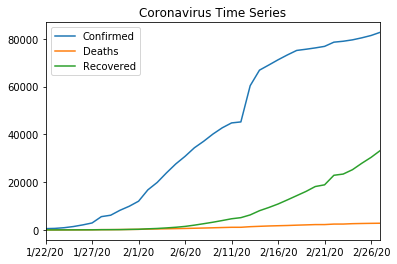

In [9]:
# plot aggregate data
ax = aggregate_confirmed.plot(legend=True, title='Coronavirus Time Series', label='Confirmed')
aggregate_deaths.plot(ax=ax, legend=True, label='Deaths')
aggregate_recovery.plot(ax=ax, legend=True, label='Recovered')

In [18]:
# calculating daily deltas
confirmed_daily_delta = (aggregate_confirmed[-1] - aggregate_confirmed[-2])/aggregate_confirmed[-2]
deaths_daily_delta = (aggregate_deaths[-1] - aggregate_deaths[-2])/aggregate_deaths[-2]
recovery_daily_delta = (aggregate_recovery[-1] - aggregate_recovery[-2])/aggregate_recovery[-2]

# calculating weekly deltas
confirmed_weekly_delta = (aggregate_confirmed[-1] - aggregate_confirmed[-8])/aggregate_confirmed[-8]
deaths_weekly_delta = (aggregate_deaths[-1] - aggregate_deaths[-8])/aggregate_deaths[-8]
recovery_weekly_delta = (aggregate_recovery[-1] - aggregate_recovery[-8])/aggregate_recovery[-8]

In [21]:
# create deltas dataframe
deltas = {'Daily Delta': [confirmed_daily_delta, deaths_daily_delta, recovery_daily_delta], 
          'Weekly Delta': [confirmed_weekly_delta, deaths_weekly_delta, recovery_weekly_delta]}
delta_df = pd.DataFrame(data=deltas, index=['Confirmed', 'Deaths', 'Recovered'])
delta_df

,Daily Delta,Weekly Delta
Confirmed,0.016696,0.086051
Deaths,0.015884,0.252336
Recovered,0.095215,0.830720


In [26]:
# convert to percentage for easy understanding
delta_df_percent = (delta_df * 100).astype(str) + '%'
delta_df_percent

,Daily Delta,Weekly Delta
Confirmed,1.6695947025074633%,8.605099804459377%
Deaths,1.5884476534296028%,25.233644859813083%
Recovered,9.521458662453924%,83.0720140837322%
